In [ ]:
#Dina Pinchuck 
#this part of the project uses dropout and augmentation

First i downloaded the zip of pictures and seperated each category maunally and split it 70 -30 : 70% of each category for training and 30% for testing

---

why i chose to split the data 70/30
https://www.researchgate.net/post/Is-there-an-ideal-ratio-between-a-training-set-and-validation-set-Which-trade-off-would-you-suggest


In [ ]:
!gdown --id 1UYZwlIuFdP37kpFXFFQ9RzHSuVfOLdv3 #downloading the file from google drive
#https://drive.google.com/file/d/1UYZwlIuFdP37kpFXFFQ9RzHSuVfOLdv3/view?usp=sharing
import os
import zipfile
!unzip image_data.zip #unzipping the file so it can be used

Downloading...
From: https://drive.google.com/uc?id=1UYZwlIuFdP37kpFXFFQ9RzHSuVfOLdv3
To: /content/image_data.zip
95.7MB [00:01, 85.8MB/s]
Archive:  image_data.zip
   creating: test/cloudy/
  inflating: test/cloudy/cloudy211.jpg  
  inflating: test/cloudy/cloudy212.jpg  
  inflating: test/cloudy/cloudy213.jpg  
  inflating: test/cloudy/cloudy214.jpg  
  inflating: test/cloudy/cloudy215.jpg  
  inflating: test/cloudy/cloudy216.jpg  
  inflating: test/cloudy/cloudy217.jpg  
  inflating: test/cloudy/cloudy218.jpg  
  inflating: test/cloudy/cloudy219.jpg  
  inflating: test/cloudy/cloudy220.jpg  
  inflating: test/cloudy/cloudy221.jpg  
  inflating: test/cloudy/cloudy222.jpg  
  inflating: test/cloudy/cloudy223.jpg  
  inflating: test/cloudy/cloudy224.jpg  
  inflating: test/cloudy/cloudy225.jpg  
  inflating: test/cloudy/cloudy226.jpg  
  inflating: test/cloudy/cloudy227.jpg  
  inflating: test/cloudy/cloudy228.jpg  
  inflating: test/cloudy/cloudy229.jpg  
  inflating: test/cloudy/cloudy

In [ ]:

train_dir ='/content/train'
validation_dir = '/content/test'

# Directory with our training cloudy pictures
train_cloudy_dir = os.path.join(train_dir, 'cloudy')

# Directory with our training rain pictures
train_rain_dir = os.path.join(train_dir, 'rain')


# Directory with our training shine pictures
train_shine_dir = os.path.join(train_dir, 'shine')

# Directory with our training sunrise pictures
train_sunrise_dir = os.path.join(train_dir, 'sunrise')


# Directory with our validation cloudy pictures
validation_cloudy_dir = os.path.join(validation_dir, 'cloudy')

# Directory with our validation rain pictures
validation_rain_dir = os.path.join(validation_dir, 'rain')


# Directory with our validation shine pictures
validation_shine_dir = os.path.join(validation_dir, 'shine')

# Directory with our validation sunrise pictures
validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')

#printing sizes of each category of training images
print('total training cloudy images:', len(os.listdir(train_cloudy_dir)))
print('total training rain images:', len(os.listdir(train_rain_dir)))
print('total training shine images:', len(os.listdir(train_shine_dir)))
print('total training sunrise images:', len(os.listdir(train_sunrise_dir)))

#printing sizes of each category of validation images
print('total validation cloudy images:', len(os.listdir(validation_cloudy_dir)))
print('total validation rain images:', len(os.listdir(validation_rain_dir)))
print('total validation shine images:', len(os.listdir(validation_shine_dir)))
print('total validation sunrise images:', len(os.listdir(validation_sunrise_dir)))

total training cloudy images: 210
total training rain images: 150
total training shine images: 177
total training sunrise images: 250
total validation cloudy images: 90
total validation rain images: 65
total validation shine images: 76
total validation sunrise images: 107


In [ ]:
#imports needed for building a model and plotting graphs
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Building the first model like in assignment 5

In [ ]:
from tensorflow import keras

model1 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        # First convolution extracts 16 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Second convolution extracts 32 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Third convolution extracts 64 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Flatten feature map to a 1-dim tensor so we can add fully connected layers
        layers.Flatten(),
        layers.Dropout(0.5), 
        layers.Dense(512, activation='relu'),
        layers.Dense(4, activation='sigmoid'),
    ]
)

Generators for training and validation data

In [ ]:
# data augmentation on the training data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,)

# rescaling validation data - augmentation isn't done to the testing data
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=8,
        # Since we have more than two types of pictures the class mode is categorical
        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=8,
        class_mode='categorical')

Found 787 images belonging to 4 classes.
Found 338 images belonging to 4 classes.


compiling and running the first model

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
history1 = model1.fit_generator(
      train_generator,
      steps_per_epoch=98,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=42,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
98/98 - 41s - loss: 1.0890 - acc: 0.6072 - val_loss: 0.5825 - val_acc: 0.7470
Epoch 2/10
98/98 - 9s - loss: 0.6478 - acc: 0.7612 - val_loss: 0.5413 - val_acc: 0.7619
Epoch 3/10
98/98 - 9s - loss: 0.5983 - acc: 0.7561 - val_loss: 0.2956 - val_acc: 0.9226
Epoch 4/10
98/98 - 9s - loss: 0.6048 - acc: 0.8216 - val_loss: 0.3899 - val_acc: 0.8929
Epoch 5/10
98/98 - 9s - loss: 0.5153 - acc: 0.8177 - val_loss: 0.4314 - val_acc: 0.8452
Epoch 6/10
98/98 - 9s - loss: 0.5438 - acc: 0.8087 - val_loss: 0.4089 - val_acc: 0.8750
Epoch 7/10
98/98 - 9s - loss: 0.5708 - acc: 0.8177 - val_loss: 0.3034 - val_acc: 0.8839
Epoch 8/10
98/98 - 9s - loss: 0.4597 - acc: 0.8421 - val_loss: 0.3046 - val_acc: 0.8988
Epoch 9/10
98/98 - 9s - loss: 0.4691 - acc: 0.8357 - val_loss: 0.4503 - val_acc: 0.8690
Epoch 10/10
98/98 - 9s - loss: 0.4296 - acc: 0.8665 - val_loss: 0.4792 - val_acc: 0.9226


printing graphs for the first model

43/43 - 1s - loss: 0.4772 - acc: 0.9231
Test loss: 0.4771568179130554
Test accuracy: 0.9230769276618958


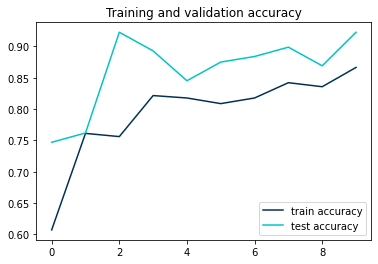

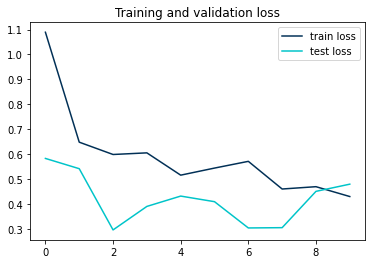

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

# Get number of epochs
epochs = range(len(acc1))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc1,label="train accuracy",color='#013056')
plt.plot(epochs, val_acc1,label="test accuracy",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss1,label="train loss",color='#013056')
plt.plot(epochs, val_loss1,label="test loss",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation loss')

#checking the accuracy and loss
score = model1.evaluate(validation_generator, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Second model using softmax and more filters

In [ ]:
model2 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        # First convolution extracts 32 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Second convolution extracts 64 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Third convolution extracts 128 filters that are 3x3
        # Convolution is followed by max-pooling layer with a 2x2 window
        layers.Conv2D(128, 3, activation='relu'),
        layers.MaxPooling2D(2),
        # Flatten feature map to a 1-dim tensor so we can add fully connected layers
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')# four is the amount of categories in the data set
    ]
)

Running the second model

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=98,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=42,
      verbose=2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


98/98 - 10s - loss: 0.8617 - acc: 0.5892 - val_loss: 0.8512 - val_acc: 0.6429
Epoch 2/10
98/98 - 9s - loss: 0.6656 - acc: 0.7587 - val_loss: 0.4849 - val_acc: 0.8810
Epoch 3/10
98/98 - 9s - loss: 0.5942 - acc: 0.7522 - val_loss: 0.4170 - val_acc: 0.8690
Epoch 4/10
98/98 - 9s - loss: 0.5594 - acc: 0.7779 - val_loss: 0.4268 - val_acc: 0.8750
Epoch 5/10
98/98 - 9s - loss: 0.5325 - acc: 0.7869 - val_loss: 0.4411 - val_acc: 0.8839
Epoch 6/10
98/98 - 9s - loss: 0.5218 - acc: 0.8100 - val_loss: 0.3418 - val_acc: 0.8929
Epoch 7/10
98/98 - 9s - loss: 0.4644 - acc: 0.8254 - val_loss: 0.3607 - val_acc: 0.8899
Epoch 8/10
98/98 - 9s - loss: 0.4437 - acc: 0.8241 - val_loss: 0.3473 - val_acc: 0.9048
Epoch 9/10
98/98 - 9s - loss: 0.4054 - acc: 0.8549 - val_loss: 0.3347 - val_acc: 0.8929
Epoch 10/10
98/98 - 9s - loss: 0.4167 - acc: 0.8434 - val_loss: 0.4788 - val_acc: 0.8333


Graphing the softmax model results

43/43 - 1s - loss: 0.4759 - acc: 0.8343
Test loss: 0.47592926025390625
Test accuracy: 0.834319531917572


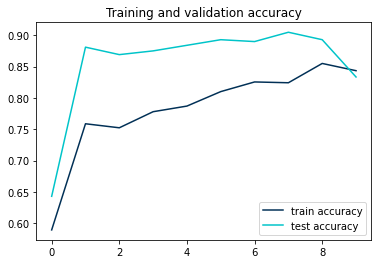

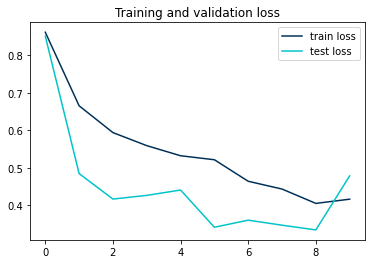

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# Get number of epochs
epochs = range(len(acc2))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc2,label="train accuracy",color='#013056')
plt.plot(epochs, val_acc2,label="test accuracy",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss2,label="train loss",color='#013056')
plt.plot(epochs, val_loss2,label="test loss",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation loss')

#checking the accuracy and loss
score = model2.evaluate(validation_generator, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

results of adding augmentation - the first model improved from 91% to 92% and the second model gave worse results 88% to 83%. (based on the last time I ran the code)